<a href="https://colab.research.google.com/github/antosiant/Educational_tasks/blob/main/Data_cleaning_Block_4_L6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
industries = r'C:\$Antonina\Data Analyst\4 Блок\industries.csv'
applications = r'C:\$Antonina\Data Analyst\4 Блок\applications.csv'
industries_df = pd.read_csv(industries)
applications_df = pd.read_csv(applications)

In [ ]:
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [ ]:
applications_df.columns

Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id'],
      dtype='object')

### Removing duplicate 'applicant_id' / Прибираємо дублікати 'applicant_id'

In [ ]:
applications_df.drop_duplicates(subset = ['applicant_id'], inplace = True)

###  Filling the missing values in the 'External Rating' field with zeros / Заповнюємо в полі 'External Rating' відсутні значення нулями

In [ ]:
applications_df['External Rating'].fillna(0, inplace = True)

### Fillinf in the missing values in the 'Education level' field with the text “Середня” / Заповнюємо в полі 'Education level' відсутні значення текстом “Середня”

In [ ]:
applications_df['Education level'].fillna("Середня", inplace = True)

In [ ]:
industries_df.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


###  Adding data from the industries.csv file to this DataFrame, namely, industry ratings. / Додаємо до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.

In [ ]:
applications_df = pd.merge(applications_df, industries_df, on = 'Industry', how = 'left')

In [ ]:
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15


### Calculating the rating of the application / Розраховуємо рейтинг заявки

In [ ]:
applications_df['Applied at'] = pd.to_datetime(applications_df['Applied at'])
calculate_rating = lambda x: ((55>=x['Age'] >= 35) * 20 +
                              (x['Applied at'].isoweekday()<=5)*20 +
                              (x['Marital status'] == "Married")*20 +
                              (x['Location'] == "Київ чи область")*20 +
                               x['Score'] +
                              (x['External Rating']>=7)*20 +
                              (x['External Rating']<=2)*(-20)
                             )
applications_df['calculate_rating'] = applications_df.apply(calculate_rating, axis=1)
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,calculate_rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,40
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,60
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,50
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,15
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35


### We leave only applications with a rating greater than zero, these applications are considered accepted. / Залишаємо лише заяви з рейтингом більше нуля, ці заявки вважаються прийнятими.

In [ ]:
applications_df_cleaned = applications_df[applications_df['calculate_rating']>0]
applications_df_cleaned

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,calculate_rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,40
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,60
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,50
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,15
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35
...,...,...,...,...,...,...,...,...,...,...,...,...
13273,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,35
13274,2023-01-09 11:14:00,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0,40
13275,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,40
13276,2023-01-09 11:28:00,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15,55


### We group the data from the resulting table by the week of application submission, and plot the average rating of accepted applications in each week. / Дані з результуючої таблиці групуємо за тижнем подачі заявки, та виводимо на графік середній рейтинг прийнятих заявок у кожен тиждень.

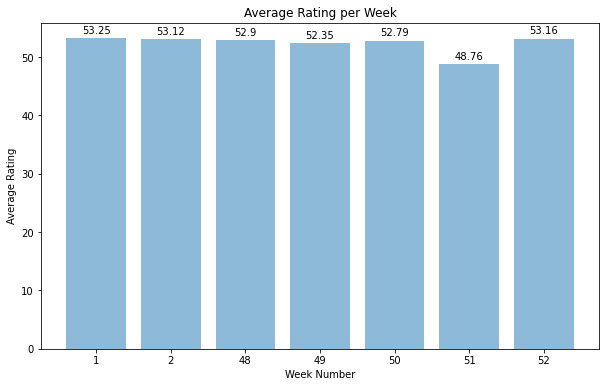

In [ ]:
rating = applications_df_cleaned.pivot_table(values='calculate_rating',
                                             index=applications_df_cleaned['Applied at'].dt.isocalendar().week,
                                             aggfunc='mean')

week_numbers = rating.index.astype(str).tolist()
average_ratings = rating['calculate_rating'].tolist()

plt.figure(figsize=(10, 6))
plt.bar(week_numbers, average_ratings, align='center', alpha=0.5)
plt.xlabel('Week Number')
plt.ylabel('Average Rating')
plt.title('Average Rating per Week')
[plt.text(i, v + 0.5, str(np.round(v,2)), ha='center', va='bottom', fontsize=10) for i, v in enumerate(average_ratings)]
plt.show()